In [1]:
import numpy as np 
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print( faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [2]:
peopleindexwithglass=[(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
(330, 339), (358, 359), (360, 369)]

In [3]:
    m = np.zeros(faces.target.shape[0])
    for (s, e) in peopleindexwithglass:
        m[s:e + 1] = 1
    target_glasses=m


In [4]:
from sklearn.model_selection import train_test_split
X = faces["data"]
y=target_glasses
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=42)
X_train.size
print(len(X_train), ":x train ", len(X_test), ":x test",len(y_train), ":y train ", len(y_test), ":y test")

300 :x train  100 :x test 300 :y train  100 :y test


In [5]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear",C=1)

In [6]:
svm_clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
prd=svm_clf.predict(X_train)
print('%',svm_clf.score(X_train,y_train)*100)

% 100.0


In [8]:
prd=svm_clf.predict(X_test)
print('%',svm_clf.score(X_test,y_test)*100)

% 96.0


In [9]:
prd = svm_clf.predict(X_test)
eval_faces = [np.reshape(i, (64, 64)) for i in X_test]

    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    


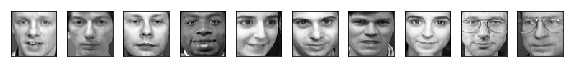

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
for i in range(10):
    p = fig.add_subplot(20, 20, i + 1,xticks=[], yticks=[])
    p.imshow(eval_faces[i], cmap="gray")
    
s="    "
for i in range(10):
    s+=str(prd[i])
    s+=("    ")

print(s)
